In [1]:
%load_ext autoreload
%autoreload 2

# 1. Linear Regression
## 1.5. Triển khai Linear Regression
### 1.5.1. Ví dụ
* Xây dựng regression model để dự đoán `flight duration` _(thời gian bay)_ từ `distance` _(khoảng cách từ sân này A đến sân bay B)_ (mile). 

In [2]:
from modules.my_pyspark import *

In [3]:
spark = MyPySpark(session=True)

### 1.5.2. Đọc dữ liệu

In [4]:
data_path = r"./data/flights.csv"

In [5]:
data = spark.readFile(data_path, 'csv')

In [6]:
data.show(3, False)

+---+---+---+-------+------+---+----+------+--------+-----+
|mon|dom|dow|carrier|flight|org|mile|depart|duration|delay|
+---+---+---+-------+------+---+----+------+--------+-----+
|11 |20 |6  |US     |19    |JFK|2153|9.48  |351     |NA   |
|0  |22 |2  |UA     |1107  |ORD|316 |16.33 |82      |30   |
|2  |20 |4  |UA     |226   |SFO|337 |6.17  |82      |-8   |
+---+---+---+-------+------+---+----+------+--------+-----+
only showing top 3 rows



In [7]:
data.describe().toPandas()

,summary,mon,dom,dow,carrier,flight,org,mile,depart,duration,delay
0,count,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000
1,mean,5.2351,15.66196,2.95236,None,2054.31344,None,882.40112,14.130952600000064,151.76582,28.663795670111863
2,stddev,3.437758623534696,8.772488135606777,1.966033503314405,None,2182.4715300582875,None,701.232785607705,4.694052286573998,87.04507290261697,54.24034253403119
3,min,0,1,0,AA,1,JFK,67,0.25,30,-1
4,max,11,31,6,WN,6941,TUS,4243,23.98,560,NA


In [8]:
data.printSchema()

root
 |-- mon: integer (nullable = true)
 |-- dom: integer (nullable = true)
 |-- dow: integer (nullable = true)
 |-- carrier: string (nullable = true)
 |-- flight: integer (nullable = true)
 |-- org: string (nullable = true)
 |-- mile: integer (nullable = true)
 |-- depart: double (nullable = true)
 |-- duration: integer (nullable = true)
 |-- delay: string (nullable = true)



> **Nhận xét**
> * **Predictor variable**: `mile`
> * **Target variable**: `duration`

### 1.5.3. Chuyển đổi dữ liệu

In [9]:
predictor_features = ['mile']
target_feature = 'duration'

In [10]:
from modules.my_spark_linear_regression import *

In [11]:
lr_model = MySparkLinearRegression(data, predictor_features, target_feature)

In [12]:
lr_model.prepareData()

In [13]:
lr_model.df_data.show(5)

+--------+--------+
|features|duration|
+--------+--------+
|[2153.0]|     351|
| [316.0]|      82|
| [337.0]|      82|
|[1236.0]|     195|
| [258.0]|      65|
+--------+--------+
only showing top 5 rows



### 1.5.4. Chia dữ liệu thành training data và test data

In [14]:
lr_model.trainTestSplit(.8)

In [15]:
lr_model.describeTarget()

+-------+-----------------+------------------+
|summary| duration (train)|   duration (test)|
+-------+-----------------+------------------+
|  count|            40013|              9987|
|   mean|151.3587833953965|153.39661560028037|
| stddev|86.64909787638018| 88.59944925298241|
|    min|               30|                30|
|    max|              560|               560|
+-------+-----------------+------------------+



> **Nhận xét**:
> * Thống kê mô tả trên hai tập training data và test data tốt.

### 1.5.5. Xây dựng model

In [16]:
lr_model.buildModel()

In [17]:
lr_model.coefficients

array([0.1216481])

In [18]:
lr_model.intercept

44.36802193375428

### 1.5.6. Đánh giá model

In [19]:
metric, residual = lr_model.evaluate()

In [20]:
metric

,Metric,Value
0,MAE,13.181858
1,MSE,298.937440
2,RMSE,17.289807
3,R-SQUARED,0.961914


> **Nhận xét**:
> * Model cho kết quả đánh giá tốt.

In [21]:
residual.describe().show()

+-------+-------------------+
|summary|          residuals|
+-------+-------------------+
|  count|               9987|
|   mean|0.27723513533861455|
| stddev| 17.288450154673992|
|    min| -75.80413547753835|
|    max| 184.18400809655262|
+-------+-------------------+



> **Nhận xét**:
> * Phần dư ổn, ko quá lớn.

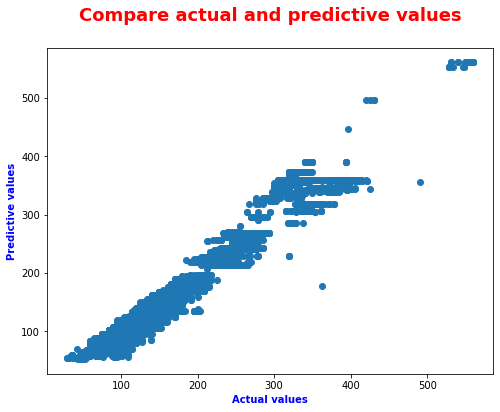

In [22]:
test_predict = lr_model.evaluateTestData(True)

In [23]:
test_predict.show()

+--------+--------+------------------+
|features|duration|  predict_duration|
+--------+--------+------------------+
|  [67.0]|      44|52.518444894528606|
|  [67.0]|      44|52.518444894528606|
|  [67.0]|      44|52.518444894528606|
|  [67.0]|      46|52.518444894528606|
|  [67.0]|      47|52.518444894528606|
|  [67.0]|      47|52.518444894528606|
|  [67.0]|      47|52.518444894528606|
|  [67.0]|      48|52.518444894528606|
|  [67.0]|      48|52.518444894528606|
|  [67.0]|      48|52.518444894528606|
|  [67.0]|      48|52.518444894528606|
|  [67.0]|      48|52.518444894528606|
|  [67.0]|      49|52.518444894528606|
|  [67.0]|      49|52.518444894528606|
|  [67.0]|      49|52.518444894528606|
|  [67.0]|      49|52.518444894528606|
|  [67.0]|      49|52.518444894528606|
|  [67.0]|      50|52.518444894528606|
|  [67.0]|      50|52.518444894528606|
|  [67.0]|      50|52.518444894528606|
+--------+--------+------------------+
only showing top 20 rows



### 1.5.7. Lưu và load model

#### 1.5.7.1. Lưu model

In [24]:
save_path = r"./models/flights_LinearRegression_0"

In [25]:
lr_model.saveModel(save_path)

#### 1.5.7.2. Load model

In [26]:
lr_model_load = mySparkLinearRegressionLoadModel(save_path)

* Dự đoán bằng `lr_model_load`

In [27]:
model_load_predict_res = lr_model_load.transform(lr_model.test_data.select('features'))

In [28]:
model_load_predict_res.show()

+--------+------------------+
|features|  predict_duration|
+--------+------------------+
|  [67.0]|52.518444894528606|
|  [67.0]|52.518444894528606|
|  [67.0]|52.518444894528606|
|  [67.0]|52.518444894528606|
|  [67.0]|52.518444894528606|
|  [67.0]|52.518444894528606|
|  [67.0]|52.518444894528606|
|  [67.0]|52.518444894528606|
|  [67.0]|52.518444894528606|
|  [67.0]|52.518444894528606|
|  [67.0]|52.518444894528606|
|  [67.0]|52.518444894528606|
|  [67.0]|52.518444894528606|
|  [67.0]|52.518444894528606|
|  [67.0]|52.518444894528606|
|  [67.0]|52.518444894528606|
|  [67.0]|52.518444894528606|
|  [67.0]|52.518444894528606|
|  [67.0]|52.518444894528606|
|  [67.0]|52.518444894528606|
+--------+------------------+
only showing top 20 rows

